In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, metrics

In [2]:
df=pd.read_csv("C:\\Users\\Avila\\OneDrive\\Desktop\\csv files\\ad1.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,78.84,30,68448.94,161.79,Front-line even-keeled website,Silvaton,Male,Peru,04/04/2016 03:57,1
1,60.23,35,66815.54,216.24,Front-line fresh-thinking open system,West Jeremyside,Male,Papua New Guinea,06/18/2016 16:02,0
2,46.20,49,62109.80,135.24,Enhanced maximized access,Lake Vanessa,Male,Chile,06/26/2016 07:01,1
3,87.85,31,50055.33,134.46,Total zero administration software,Port Sherrystad,Male,French Polynesia,04/18/2016 21:07,1
4,64.38,37,55121.65,232.54,Devolved regional moderator,South Patrickfort,Female,Bosnia and Herzegovina,07/18/2016 18:33,0


In [3]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  999 non-null    float64
 1   Age                       999 non-null    int64  
 2   Area Income               999 non-null    float64
 3   Daily Internet Usage      999 non-null    float64
 4   Ad Topic Line             999 non-null    object 
 5   City                      999 non-null    object 
 6   Gender                    999 non-null    object 
 7   Country                   999 non-null    object 
 8   Timestamp                 999 non-null    object 
 9   Clicked on Ad             999 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.2+ KB


In [5]:
to_drop = ['Timestamp','City','Ad Topic Line']
df.drop(to_drop,axis=1,inplace=True)

In [6]:
cat_cols= ['Country','Gender']
df1 = pd.get_dummies(df,columns= cat_cols)

In [7]:
df1.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked on Ad', 'Country_Afghanistan',
       'Country_Albania', 'Country_Algeria', 'Country_American Samoa',
       'Country_Andorra',
       ...
       'Country_Uruguay', 'Country_Uzbekistan', 'Country_Vanuatu',
       'Country_Venezuela', 'Country_Wallis and Futuna',
       'Country_Western Sahara', 'Country_Zambia', 'Country_Zimbabwe',
       'Gender_Female', 'Gender_Male'],
      dtype='object', length=152)

### Data Split

In [10]:
x = df1.drop(['Clicked on Ad'], axis = 1)
y = df1['Clicked on Ad']

In [11]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,999.0,63.194184,15.125537,32.60,48.730,66.01,75.84,89.80
Age,999.0,36.543544,9.132396,20.00,30.000,35.00,42.00,60.00
Area Income,999.0,53937.070180,11065.885432,20592.99,47929.830,55642.32,62792.43,77460.07
Daily Internet Usage,999.0,174.371321,42.043156,105.86,135.275,167.67,213.75,251.08
Country_Afghanistan,999.0,0.017017,0.129399,0.00,0.000,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...
Country_Western Sahara,999.0,0.011011,0.104406,0.00,0.000,0.00,0.00,1.00
Country_Zambia,999.0,0.002002,0.044721,0.00,0.000,0.00,0.00,1.00
Country_Zimbabwe,999.0,0.007007,0.083456,0.00,0.000,0.00,0.00,1.00
Gender_Female,999.0,0.521522,0.499787,0.00,0.000,1.00,1.00,1.00


### Pre-processing

In [12]:
#Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [13]:
#NOTE: Only scale the predictor variables, NOT the target variable

#Instantiate the Scaler
scaler = MinMaxScaler()

#Fit and Transform to the Train Set

In [14]:
x_train_scaled = scaler.fit_transform(x_train)

#Transform the Test Set
x_test_scaled = scaler.transform(x_test)

### Training Model

In [15]:
#Define the Model
k = 3

classifier = KNeighborsClassifier(n_neighbors=k, p=2 ,metric='euclidean')

classifier.fit(x_train,y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=1, n_neighbors=k, p=2
                    , weights ='uniform')

KNeighborsClassifier(metric='euclidean', n_jobs=1, n_neighbors=3)

In [16]:
import math
math.sqrt(len(y_test))

17.320508075688775

### Prediction

In [17]:
y_pred = classifier.predict(x_test)
y_pred

C:\Users\Avila\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1], d

### Accuracy Score

In [18]:
print(accuracy_score(y_test, y_pred)*100)

64.66666666666666


### Classification Report

In [19]:
print("Classification Report for classifier %s:\n%s\n" 
      % (classifier,metrics.classification_report(y_test, y_pred)))

Classification Report for classifier KNeighborsClassifier(metric='euclidean', n_neighbors=3):
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       135
           1       0.68      0.67      0.68       165

    accuracy                           0.65       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.65      0.65      0.65       300




### Confusion Matrix

In [20]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[ 83  52]
 [ 54 111]]


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

## Visualization

Text(0.5, 47.7222222222222, 'Predicted label')

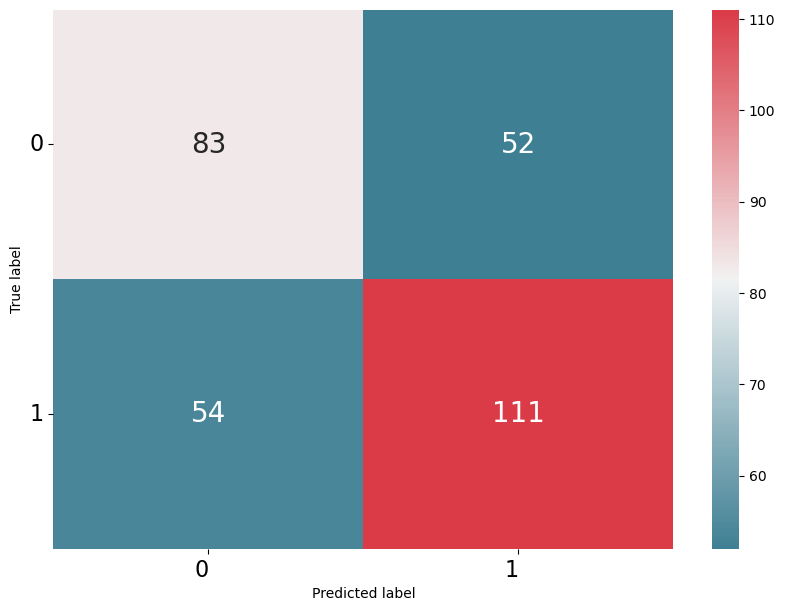

In [26]:
#Plot the confusion matrix for easier viewing
cm = metrics.confusion_matrix(y_test, y_pred)

labels=[0,1]

df_cm = pd.DataFrame(cm, index=labels, columns=labels)

#Plot attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap = sns.heatmap(df_cm,annot=True, annot_kws={"size": 20}, fmt="d", cmap=cmap)

#Heatmap attributes
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')